# Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

## Imports & Settings

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Set seaborn style and pandas display options
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

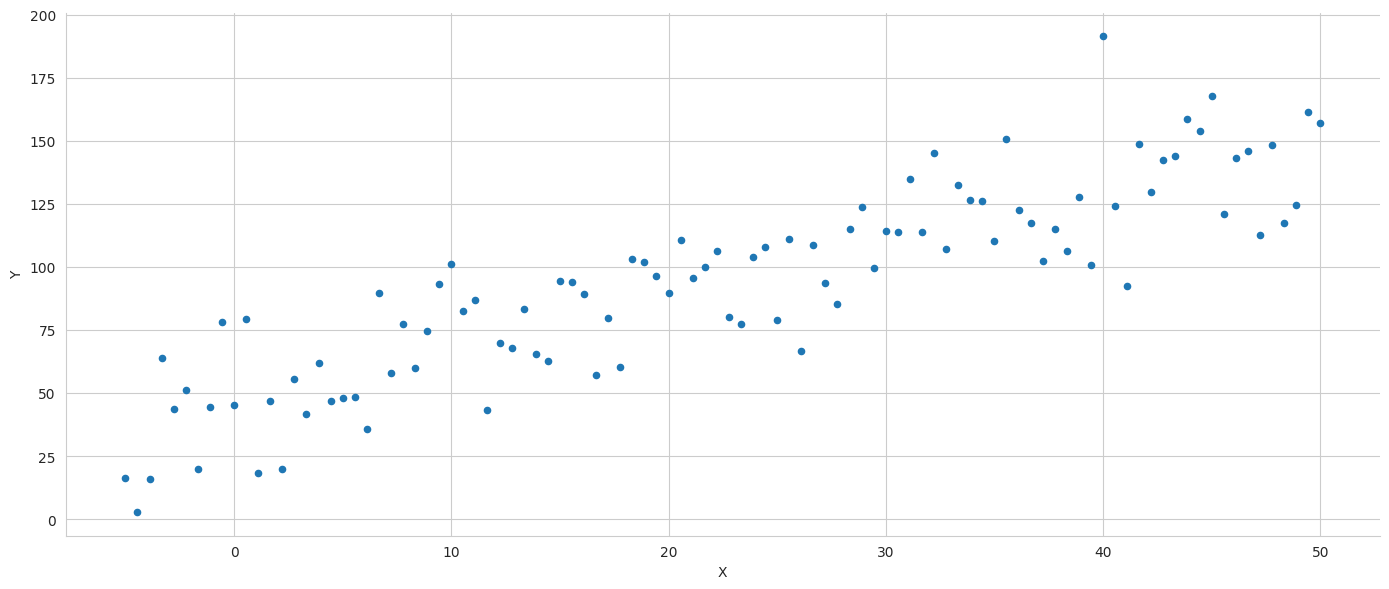

In [ ]:
# Generate x values from -5 to 50
x = np.linspace(-5, 50, 100)

# Generate y values with a linear relationship to x plus some random noise
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))

# Create a DataFrame with the generated data
data = pd.DataFrame({'X': x, 'Y': y})

# Plot the data
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

#### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that standard error estimates do not account for heteroskedasticity.

The middle panel shows the coefficient values that closely reflect the artificial data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [ ]:
# Add a constant term to X for the intercept
X = sm.add_constant(data['X'])

# Fit the OLS model
model = sm.OLS(data['Y'], X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     323.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           8.49e-33
Time:                        05:28:24   Log-Likelihood:                -434.23
No. Observations:                 100   AIC:                             872.5
Df Residuals:                      98   BIC:                             877.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4929      3.238     14.360      0.0

In [ ]:
# Verify calculation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(pd.Series(beta, index=X.columns))

const   46.49
X        2.11
dtype: float64


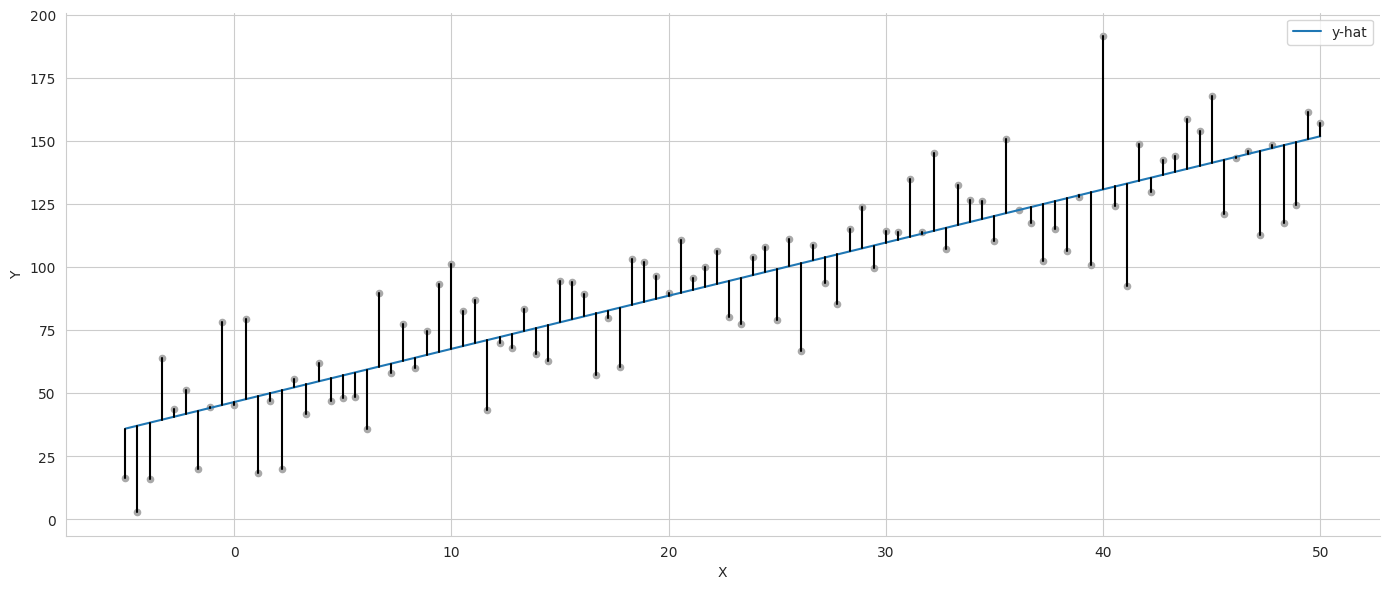

In [ ]:
# Display model & residuals
data['y-hat'] = model.predict()
data['residuals'] = model.resid

# Plot the data, fitted line, and residuals
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax)
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout()

### Multiple Regression

For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

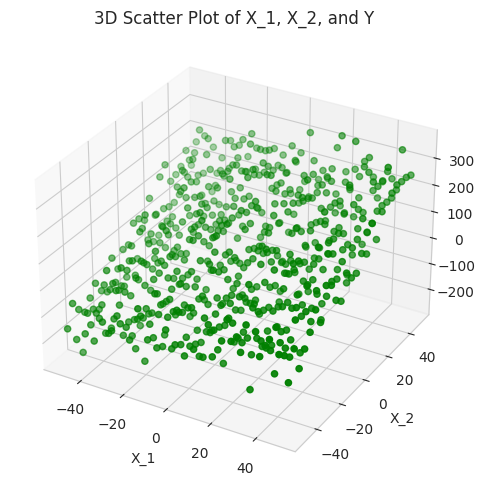

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

# Create a 2D grid of X_1 and X_2 values
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')

# Create a DataFrame with X_1 and X_2
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})

# Generate Y values with a linear relationship to X_1 and X_2 plus some random noise
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X_1, data.X_2, data.Y, c='g')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.title('3D Scatter Plot of X_1, X_2, and Y')
plt.tight_layout()
plt.show()

# Prepare X and y for the model
X = data[['X_1', 'X_2']]
y = data['Y']


In [ ]:
# Prepare X and y for the model
X = data[['X_1', 'X_2']]
y = data['Y']

# Estimate multiple regression model with statsmodels
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1161.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.05e-210
Time:                        05:31:46   Log-Likelihood:                -3336.5
No. Observations:                 625   AIC:                             6679.
Df Residuals:                     622   BIC:                             6692.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5457      2.020     26.014      0.0

In [ ]:
# Verify computation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
print(pd.Series(beta, index=X_ols.columns))

const   52.55
X_1      1.03
X_2      3.07
dtype: float64


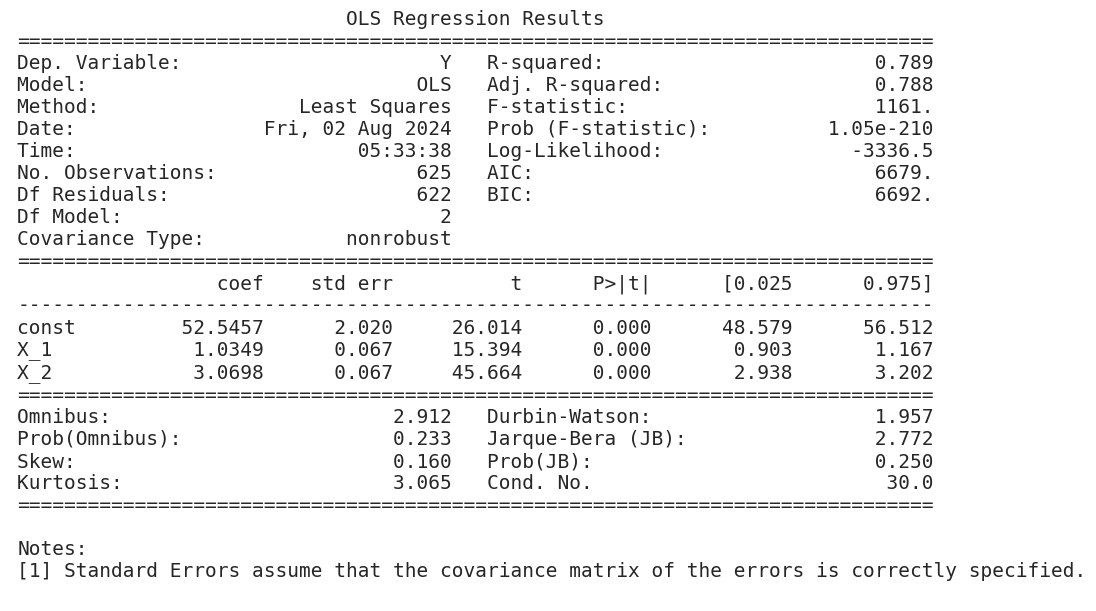

In [ ]:
# Save output as image
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300)

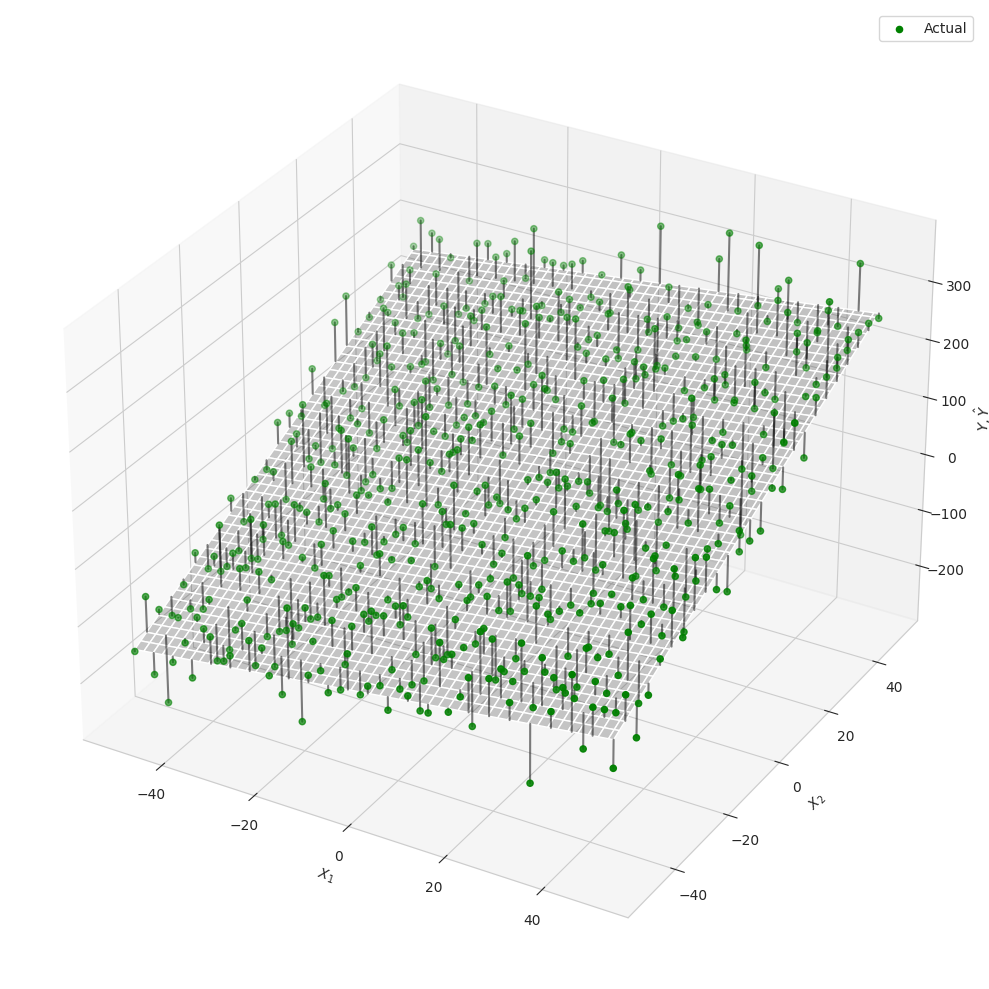

In [ ]:
# Display model & residuals
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(data.X_1, data.X_2, data.Y, c='g', label='Actual')

# Generate predicted values
data['y-hat'] = model.predict()

# Create a meshgrid for the surface plot
X1_surf, X2_surf = np.meshgrid(np.linspace(data.X_1.min(), data.X_1.max(), 100),
                               np.linspace(data.X_2.min(), data.X_2.max(), 100))

# Calculate predicted Y values for the surface
Y_surf = model.predict(sm.add_constant(pd.DataFrame({'X_1': X1_surf.ravel(), 'X_2': X2_surf.ravel()})))
Y_surf = np.array(Y_surf).reshape(X1_surf.shape)  # Convert to numpy array before reshaping

# Plot the surface
surf = ax.plot_surface(X1_surf, X2_surf, Y_surf, color='black', alpha=0.2, linewidth=1, antialiased=True)

# Plot residuals
for _, row in data.iterrows():
    ax.plot([row.X_1, row.X_1], [row.X_2, row.X_2], [row.Y, row['y-hat']], 'k-', alpha=0.5)

# Set labels
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$Y, \hat{Y}$')

# Add a legend
ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale.

### Prepare data

The gradient is sensitive to scale, so we need to use StandardScaler to adjust the features before applying SGDRegressor.

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

# Print the shape of the standardized features
print("Shape of standardized features:", X_.shape)

Shape of standardized features: (625, 2)


### Configure SGDRegressor

Now we'll set up the SGDRegressor with specific parameters:

In [ ]:
# Import SGDRegressor
from sklearn.linear_model import SGDRegressor

# Configure SGDRegressor
sgd = SGDRegressor(loss='squared_error',  # Use squared loss for linear regression
                   fit_intercept=True,   # Fit the intercept
                   shuffle=True,         # Shuffle data at each epoch
                   random_state=42,      # Set random state for reproducibility
                   learning_rate='invscaling',  # Use inverse scaling learning rate
                   eta0=0.01,            # Initial learning rate
                   power_t=0.25)         # Power for inverse scaling learning rate

# Print the configured SGDRegressor
print(sgd)

SGDRegressor(random_state=42)


### Fit Model

Now we'll fit the SGDRegressor to our standardized data:

In [ ]:
# Fit the SGDRegressor
sgd.fit(X=X_, y=y)

# Print the coefficients learned by SGDRegressor
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
print("SGDRegressor Coefficients:")
print(pd.Series(coeffs, index=X.columns))

# Print the intercept
print("\nSGDRegressor Intercept:", sgd.intercept_)

SGDRegressor Coefficients:
X_1     934.03
X_2   2,772.40
dtype: float64

SGDRegressor Intercept: [52.52582643]


### Compare SGD and OLS Results

Let's compare the results from SGDRegressor with our earlier OLS results:

Root Mean Squared Error (RMSE):
sgd   50.38
ols   50.38
dtype: float64


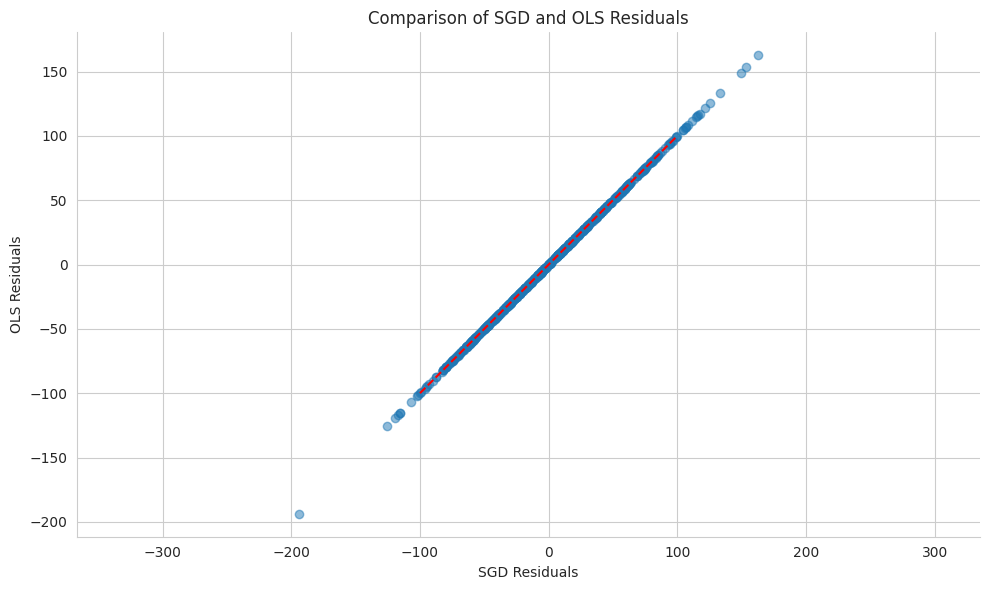

In [ ]:
# Calculate residuals for both models
resids = pd.DataFrame({
    'sgd': y - sgd.predict(X_),
    'ols': y - model.predict(sm.add_constant(X))
})

# Calculate and print RMSE for both models
rmse = resids.pow(2).sum().div(len(y)).pow(.5)
print("Root Mean Squared Error (RMSE):")
print(rmse)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(resids['sgd'], resids['ols'], alpha=0.5)
plt.xlabel('SGD Residuals')
plt.ylabel('OLS Residuals')
plt.title('Comparison of SGD and OLS Residuals')
plt.plot([-100, 100], [-100, 100], 'r--')  # Add a diagonal line
plt.axis('equal')
sns.despine()
plt.tight_layout()
plt.show()

As we can see from the results, both OLS and SGD methods yield very similar results for this dataset. The residuals from both methods are highly correlated, as evidenced by the scatter plot.

The slight differences we observe can be attributed to:
1. The stochastic nature of SGD
2. The fact that SGD might not have fully converged
3. Differences in the optimization algorithms used by the two methods

In practice, SGD can be very useful for large datasets where OLS might be computationally expensive, or for online learning scenarios where data comes in streams.